<a href="https://colab.research.google.com/github/Harivamsh2005/NLP/blob/main/NLP_T_14_08_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Step 1: Define the URL for the dataset
# This is the official URL for the CFPB Consumer Complaint Database (compressed CSV format).
# It's a large file, so pandas will download and read it.
url = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

# Step 2: Load the data using pandas.read_csv()
# We are only interested in the 'Consumer complaint narrative' column.
# Loading only the necessary column saves memory.
print("Loading data from URL... idi konchem time teskovachu...")
df_full = pd.read_csv(url, compression='zip', usecols=['Consumer complaint narrative'])
print("Data loaded successfully!")

# Step 3: Prepare the data
# The column name is long, let's rename it to 'complaint_text' for our convenience.
df_full.rename(columns={'Consumer complaint narrative': 'complaint_text'}, inplace=True)

# Some rows might not have a complaint text, so we remove those empty rows.
df_clean = df_full.dropna(subset=['complaint_text'])

# Step 4: Take the first 25 complaints for our analysis, as per the original request.
# We use .copy() to ensure we are working on a new DataFrame.
df = df_clean.head(25).copy()

# Step 5: Calculate the number of characters and words
df['char_count'] = df['complaint_text'].astype(str).str.len()
df['word_count'] = df['complaint_text'].astype(str).str.split().str.len()

# Step 6: Display the results
# Set display options to show the full complaint text without cutting it off.
pd.set_option('display.max_colwidth', None)

print("\n--- First 25 Real Customer Complaints from CFPB Dataset URL ---")
display(df)

Loading data from URL... idi konchem time teskovachu...
Data loaded successfully!

--- First 25 Real Customer Complaints from CFPB Dataset URL ---


,complaint_text,char_count,word_count
59,"On XX/XX/XXXX, I received a personal loan from the XXXX XXXX, XXXX branch of XXXX XXXX XXXX. On XX/XX/XXXX, my wife and I filed Chapter XXXX Bankruptcy which included that loan. The bankruptcy was completed on XX/XX/XXXX, and the loan is being properly listed on my credit report as Chapter XXXX Bankruptcy. \n\nHowever there is another loan listed on my credit report under Mariner Finance. It was also reportedly issued on XX/XX/XXXX, with a last payment made date of XX/XX/XXXX, the exact dates reported by XXXX XXXX XXXX. This loan is being reported as Unpaid Balance Charged Off. I have never applied for or received a loan from Mariner Finance, and certainly did not apply for or receive two entirely different loans on XX/XX/XXXX, as is currently claimed on my credit report. \n\nIn XX/XX/XXXX, XXXX XXXX XXXX merged with Mariner Finance , LLC and on XX/XX/XXXX, the company became known as Mariner Finance. It appears that sometime between the merger and the final discharge of the debt, the account was transferred from XXXX XXXX XXXX to Mariner Finance, resulting in a new account number. That doesn't make it a new loan or change the fact it was XXXX, however. \n\nOn XX/XX/XXXX, I submitted an online dispute with XXXX, identifying the duplication and noting this was likely the same loan reported twice. On XX/XX/XXXX, I received a reply claiming the accounts were verified as accurate. I'm not sure how it was verified, but someone, somewhere, is mistaken. \n\nI contacted the main office of Mariner Finance on XX/XX/XXXX, to correct this error. I spoke with XXXX and explained the problem, and was transferred to XXXX at the XXXX XXXX, XXXX branch. After I explained again, XXXX told me that her manager, XXXX, was out of the office but would return my call the following day. On the XXXX, my wife spoke with XXXX, and explained the situation yet again. He stated repeatedly there was nothing he could do and claimed if XXXX was saying it was verified, then it must be accurate. He suggested we contact an attorney if we had further questions. \n\nI am trying very hard to make sure my credit report is accurate and have hit a brick wall here. On XX/XX/XXXX, after my wife spoke with XXXX, I contacted XXXX by phone to dispute their results and still have not received any indication that they are doing anything to correct this problem.",2342,404
174,"I was listed as an authorized user on a Citibank credit card account without my knowledge or consent. Upon discovering this, I contacted Citibank directly and requested that I be removed. A Citibank representative confirmed to me by phone that I was successfully removed as an authorized user from the account. I also requested written confirmation of this action ; however, Citibank has yet to provide any written documentation. \n\nWhile both TransUnion and Equifax have removed this account from my credit report following my dispute, Equifax continues to report the account inaccurately. I have submitted XXXX separate disputes regarding this matter, yet the issue remains unresolved.",686,106
239,"My line of credit was used by an identity thief to open up a Home Depot Citibank credit account. I reported this to XXXX and to Home Depot. When I finally managed to get a hold of a live person and explained the situation, they said it would be investigated and the charges would be taken care of. A month later, I got a bill. I called back again, and they said it takes a while after the investigation to erase the account.\n\nToday I got a letter with two erroneous statements. They said that 1. Their investigation found that I was indeed responsible for the charges ( despite the fact that I wasn't in the area of the purchases at the time ).\n\n2. That I did not dispute the charges ( despite calling them twice to dispute it.\n\nI contacted Home Depot Citibank because I am unable to log on to the account online. I do not have the phone number associated with the account as I did

from matplotlib import pyplot as plt
df['char_count'].plot(kind='hist', bins=20, title='char_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='char_count', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['char_count'].plot(kind='line', figsize=(8, 4), title='char_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

Loading data from URL...
Data loaded successfully!

--- Example of POS Tagging on the first complaint ---
[('On', 'ADP'), ('XX', 'PROPN'), ('/', 'SYM'), ('XX', 'PROPN'), ('/', 'SYM'), ('XXXX', 'PROPN'), (',', 'PUNCT'), ('I', 'PRON'), ('received', 'VERB'), ('a', 'DET'), ('personal', 'ADJ'), ('loan', 'NOUN'), ('from', 'ADP'), ('the', 'DET'), ('XXXX', 'PROPN'), ('XXXX', 'PROPN'), (',', 'PUNCT'), ('XXXX', 'PROPN'), ('branch', 'NOUN'), ('of', 'ADP'), ('XXXX', 'PROPN'), ('XXXX', 'NOUN'), ('XXXX', 'NOUN'), ('.', 'PUNCT'), ('On', 'ADP'), ('XX', 'PROPN'), ('/', 'SYM'), ('XX', 'PROPN'), ('/', 'SYM'), ('XXXX', 'PROPN'), (',', 'PUNCT'), ('my', 'PRON'), ('wife', 'NOUN'), ('and', 'CCONJ'), ('I', 'PRON'), ('filed', 'VERB'), ('Chapter', 'NOUN'), ('XXXX', 'PROPN'), ('Bankruptcy', 'PROPN'), ('which', 'PRON'), ('included', 'VERB'), ('that', 'DET'), ('loan', 'NOUN'), ('.', 'PUNCT'), ('The', 'DET'), ('bankruptcy', 'NOUN'), ('was', 'AUX'), ('completed', 'VERB'), ('on', 'ADP'), ('XX', 'PROPN'), ('/', 'SYM'),

,complaint_text,verbs_and_adjectives
59,"On XX/XX/XXXX, I received a personal loan from the XXXX XXXX, XXXX branch of XXXX XXXX XXXX. On XX/XX/XXXX, my wife and I filed Chapter XXXX Bankruptcy which included that loan. The bankruptcy was completed on XX/XX/XXXX, and the loan is being properly listed on my credit report as Chapter XXXX Bankruptcy. \n\nHowever there is another loan listed on my credit report under Mariner Finance. It was also reportedly issued on XX/XX/XXXX, with a last payment made date of XX/XX/XXXX, the exact dates reported by XXXX XXXX XXXX. This loan is being reported as Unpaid Balance Charged Off. I have never applied for or received a loan from Mariner Finance, and certainly did not apply for or receive two entirely different loans on XX/XX/XXXX, as is currently claimed on my credit report. \n\nIn XX/XX/XXXX, XXXX XXXX XXXX merged with Mariner Finance , LLC and on XX/XX/XXXX, the company became known as Mariner Finance. It appears that sometime between the merger and the final discharge of the debt, the account was transferred from XXXX XXXX XXXX to Mariner Finance, resulting in a new account number. That doesn't make it a new loan or change the fact it was XXXX, however. \n\nOn XX/XX/XXXX, I submitted an online dispute with XXXX, identifying the duplication and noting this was likely the same loan reported twice. On XX/XX/XXXX, I received a reply claiming the accounts were verified as accurate. I'm not sure how it was verified, but someone, somewhere, is mistaken. \n\nI contacted the main office of Mariner Finance on XX/XX/XXXX, to correct this error. I spoke with XXXX and explained the problem, and was transferred to XXXX at the XXXX XXXX, XXXX branch. After I explained again, XXXX told me that her manager, XXXX, was out of the office but would return my call the following day. On the XXXX, my wife spoke with XXXX, and explained the situation yet again. He stated repeatedly there was nothing he could do and claimed if XXXX was saying it was verified, then it must be accurate. He suggested we contact an attorney if we had further questions. \n\nI am trying very hard to make sure my credit report is accurate and have hit a brick wall here. On XX/XX/XXXX, after my wife spoke with XXXX, I contacted XXXX by phone to dispute their results and still have not received any indication that they are doing anything to correct this problem.","[received, personal, filed, included, completed, listed, is, listed, issued, last, made, exact, reported, reported, Charged, applied, received, apply, receive, different, claimed, merged, known, appears, final, transferred, resulting, new, make, new, change, submitted, online, identifying, noting, likely, same, reported, received, claiming, verified, accurate, sure, verified, mistaken, contacted, main, correct, spoke, explained, transferred, explained, told, return, following, spoke, explained, stated, was, do, claimed, saying, verified, accurate, suggested, contact, had, further, trying, make, sure, accurate, hit, spoke, contacted, dispute, received, doing, correct]"
174,"I was listed as an authorized user on a Citibank credit card account without my knowledge or consent. Upon discovering this, I contacted Citibank directly and requested that I be removed. A Citibank representative confirmed to me by phone that I was successfully removed as an authorized user from the account. I also requested written confirmation of this action ; however, Citibank has yet to provide any written documentation. \n\nWhile both TransUnion and Equifax have removed this account from my credit report following my dispute, Equifax continues to report the account inaccurately. I have submitted XXXX separate disputes regarding this matter, yet the issue remains unresolved.","[listed, authorized, discovering, contacted, requested, removed, confirmed, removed, authorized, requested, written, has, provide, written, removed, following, continues, report, submitted, separate, regarding, remains, unresolved]


Bar chart showing POS tag frequencies has been saved as 'pos_tag_frequencies.png'


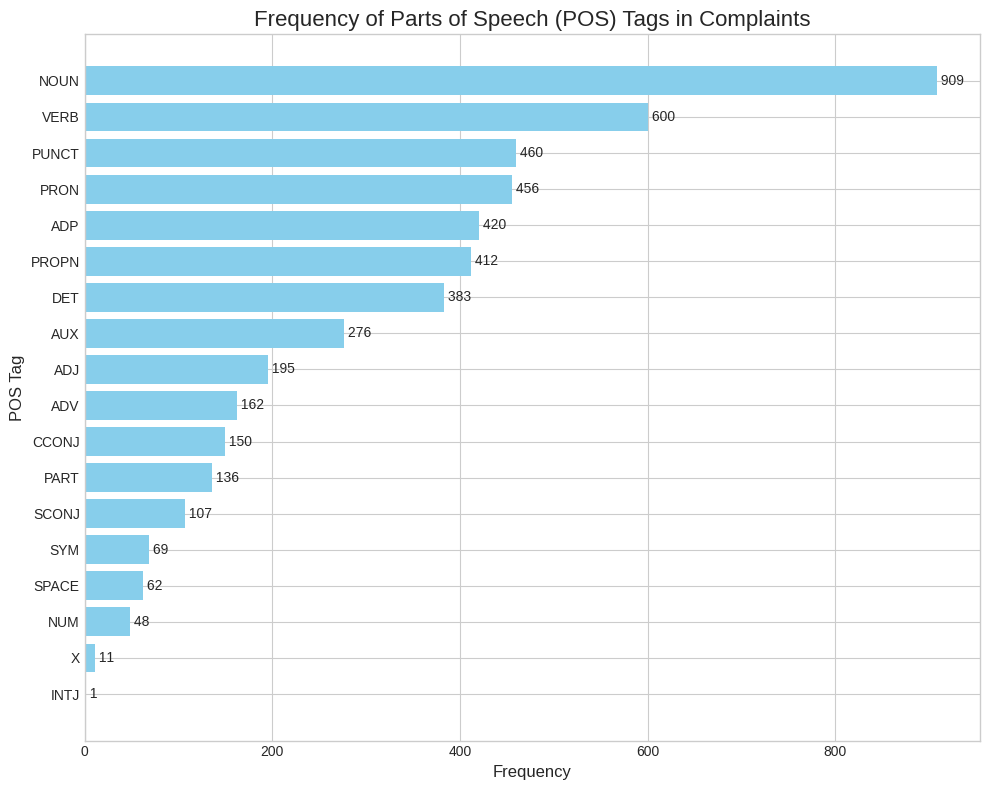

In [3]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# It's good practice to download the model if it's not installed.
# In this environment, it's usually pre-installed, so we can directly load it.
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print('Downloading language model for the first time. This may take a few minutes...')
    spacy.cli.download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

# --- Data Loading (same as before to make this code self-contained) ---
url = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'
print("Loading data from URL...")
df_full = pd.read_csv(url, compression='zip', usecols=['Consumer complaint narrative'])
df_full.rename(columns={'Consumer complaint narrative': 'complaint_text'}, inplace=True)
df_clean = df_full.dropna(subset=['complaint_text'])
df = df_clean.head(25).copy()
print("Data loaded successfully!")

# --- Q2 Pipeline using spaCy ---

# 1. Tokenization and POS Tagging demonstration on one complaint
print("\n--- Example of POS Tagging on the first complaint ---")
doc_example = nlp(df['complaint_text'].iloc[0])
pos_example = [(token.text, token.pos_) for token in doc_example]
print(pos_example)


# 2. Function to extract only verbs and adjectives
def extract_verbs_adjectives(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.pos_ in ('VERB', 'ADJ')]
    return tokens

# Apply the function to the DataFrame
df['verbs_and_adjectives'] = df['complaint_text'].apply(extract_verbs_adjectives)


# 3. Count frequency of all POS tags across all 25 complaints
all_pos_tags = []
for text in df['complaint_text']:
    doc = nlp(text)
    tags = [token.pos_ for token in doc]
    all_pos_tags.extend(tags)

pos_counts = Counter(all_pos_tags)
# Convert to a DataFrame for better display and sorting
pos_counts_df = pd.DataFrame(pos_counts.items(), columns=['POS_Tag', 'Frequency'])
pos_counts_df = pos_counts_df.sort_values(by='Frequency', ascending=False)

print("\n--- Frequency of each POS Tag across all complaints ---")
print(pos_counts_df)


# 4. Visualize POS tags in a bar chart
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

# Sort for better visualization
pos_counts_df.sort_values(by='Frequency', ascending=True, inplace=True)

ax.barh(pos_counts_df['POS_Tag'], pos_counts_df['Frequency'], color='skyblue')
ax.set_title('Frequency of Parts of Speech (POS) Tags in Complaints', fontsize=16)
ax.set_xlabel('Frequency', fontsize=12)
ax.set_ylabel('POS Tag', fontsize=12)

# Add frequency count labels to each bar
for index, value in enumerate(pos_counts_df['Frequency']):
    ax.text(value, index, f' {value}', va='center')

plt.tight_layout()
plt.savefig('pos_tag_frequencies.png')

print("\n--- DataFrame with extracted Verbs and Adjectives ---")
display(df[['complaint_text', 'verbs_and_adjectives']].head())
print("\nBar chart showing POS tag frequencies has been saved as 'pos_tag_frequencies.png'")

In [4]:
import re

# List of strings for the task
texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]

# --- 1. Find Phone Numbers ---
print("--- Finding Phone Numbers ---")
# Regex to find Indian and simple 10-digit phone numbers
phone_pattern = r'(\+91[\s-]?)?\d{10}|\d{5}[\s-]?\d{5}'
for text in texts:
    found_numbers = re.findall(phone_pattern, text)
    if found_numbers:
        print(f"In '{text[:30]}...': Found -> {found_numbers}")

# --- 2. Remove Phone Numbers, Emails, URLs, and Special Characters ---

def clean_text(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove Emails
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)
    # Remove Phone numbers (using the same pattern as above)
    text = re.sub(phone_pattern, '', text)
    # Remove special characters (except letters, numbers, whitespace, and #)
    text = re.sub(r'[^a-zA-Z0-9\s#]', '', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

print("\n--- Cleaning Text ---")
for text in texts:
    cleaned = clean_text(text)
    print(f"Original:  {text}")
    print(f"Cleaned:   {cleaned}\n")

--- Finding Phone Numbers ---
In 'My phone number is 1234567890 ...': Found -> ['']
In 'Contact us at info@company.org...': Found -> ['']

--- Cleaning Text ---
Original:  My phone number is 1234567890 and my email is test@domain.com
Cleaned:   My phone number is and my email is

Original:  Visit https://example.com for more info!!!
Cleaned:   Visit for more info

Original:  HELLO!!! This is SOOOOO exciting :))
Cleaned:   HELLO This is SOOOOO exciting

Original:  Contact us at info@company.org or call +91 98765-43210
Cleaned:   Contact us at or call 91

Original:  Python's regex is very useful!!!  #Coding #Fun
Cleaned:   Pythons regex is very useful #Coding #Fun

